In [103]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 



# Read in data

df = pd.read_csv(r'C:\Users\josej\OneDrive\Desktop\DataCorrelationProject\movies.csv')

In [45]:
# Data Exploration

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [105]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
df = df.dropna()

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [47]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [51]:
# Changing Data types

df[df.columns[df.columns.get_loc('budget')]] = pd.to_numeric(df['budget']).astype(int)
df[df.columns[df.columns.get_loc('gross')]] = pd.to_numeric(df['gross']).astype(int)

In [107]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  year_of_release  
0   46998772.0        Warner Bros.    146.0             1980  
1   58853106.0   Columbia Pictures    104.0             1980  
2  538375067.0           Lucasfilm    124.0             1980  
3   83453539.0  Paramount Pictures     88.0             1980  
4   39846344.0      Orion Pictures     98.0             1980

In [106]:
# Correcting release year column

df['year_of_release'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [108]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  year_of_release  
5445  2.847246e+09  Twentieth Century Fox    162.0             2009  
7445  2.797501e+09         Marvel Studios    181.0             2019  
3045  2.201647e+09  Twentieth Century Fox    194.0             1997  
6663  2.069522e+09              Lucasfilm    138.0             2015  
7244  2.048360e+09         Marvel Studios    149.0             2018

In [57]:
pd.set_option('display.max_rows', None)

In [63]:
# Drop any duplicates

df.drop_duplicates()

name     rating      genre  \
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6905                                    The Jungle Book         PG  Adventure   
7051                     Jumanji: Welcome to the Jungle      PG-13     Action   
6455          The Hobbit: The Battle of the Five Armies      PG-13  Adventure   
5

In [ ]:
# Budget and Revenue high correlation
# High profile companies and Revenue high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

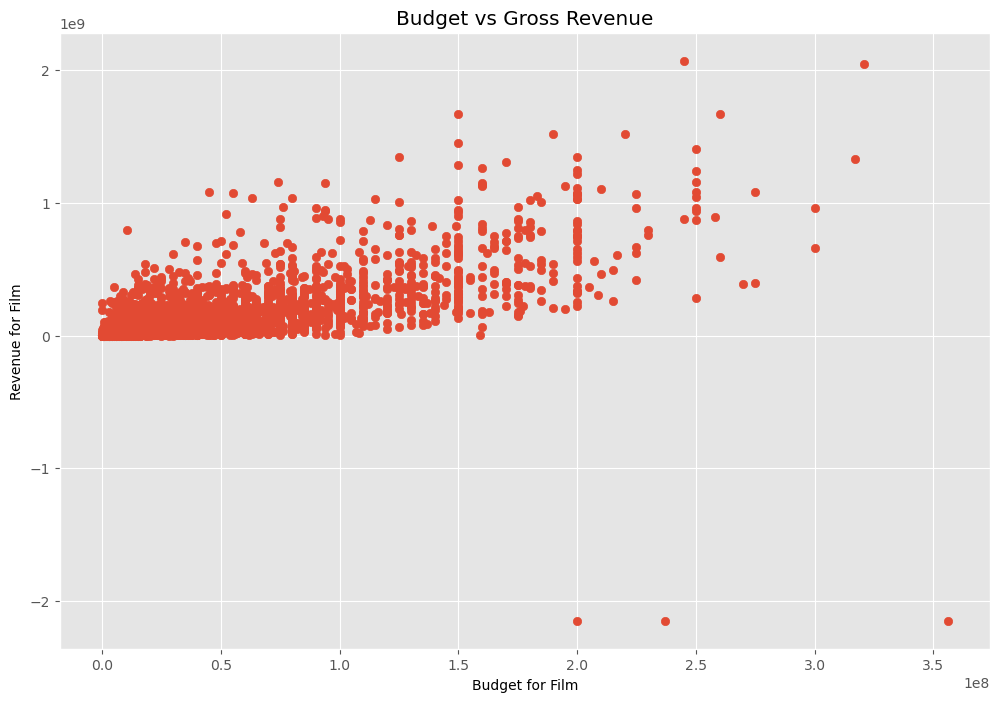

In [67]:
# Budget vs Gross Rev

plt.scatter(x=df['budget'], y = df['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget for Film')

plt.ylabel('Revenue for Film')

plt.show

In [65]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime  year_of_release  
6663  2069521700             Lucasfilm    138.0             2015  
7244  2048359754        Marvel Studios    149.0             2018  
7480  1670727580  Walt Disney Pictures    118.0             2019  
6653  1670516444    Universal Pictures    124.0             2015  
6043  1518815515        Marvel Studios    143.0             2012

<Axes: xlabel='budget', ylabel='gross'>

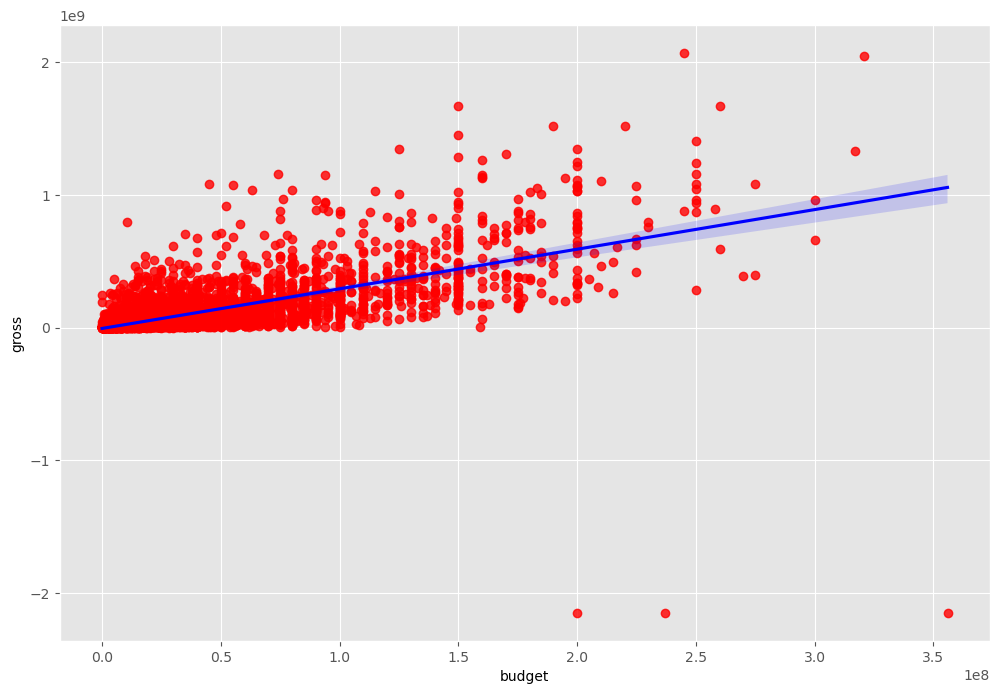

In [69]:
# Plot budget vs gross regression

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"red"}, line_kws = {"color":"blue"})

In [73]:
# Look at correlation

df.corr(numeric_only=True, method = 'pearson')

year     score     votes    budget     gross   runtime  \
year             1.000000  0.039389  0.296512  0.220833  0.238737  0.064824   
score            0.039389  1.000000  0.350185 -0.006406  0.122862  0.292254   
votes            0.296512  0.350185  1.000000  0.346274  0.551440  0.205344   
budget           0.220833 -0.006406  0.346274  1.000000  0.509844  0.231278   
gross            0.238737  0.122862  0.551440  0.509844  1.000000  0.174775   
runtime          0.064824  0.292254  0.205344  0.231278  0.174775  1.000000   
year_of_release  0.991304  0.043400  0.293044  0.213719  0.231587  0.064793   

                 year_of_release  
year                    0.991304  
score                   0.043400  
votes                   0.293044  
budget                  0.213719  
gross                   0.231587  
runtime                 0.064793  
year_of_release         1.000000

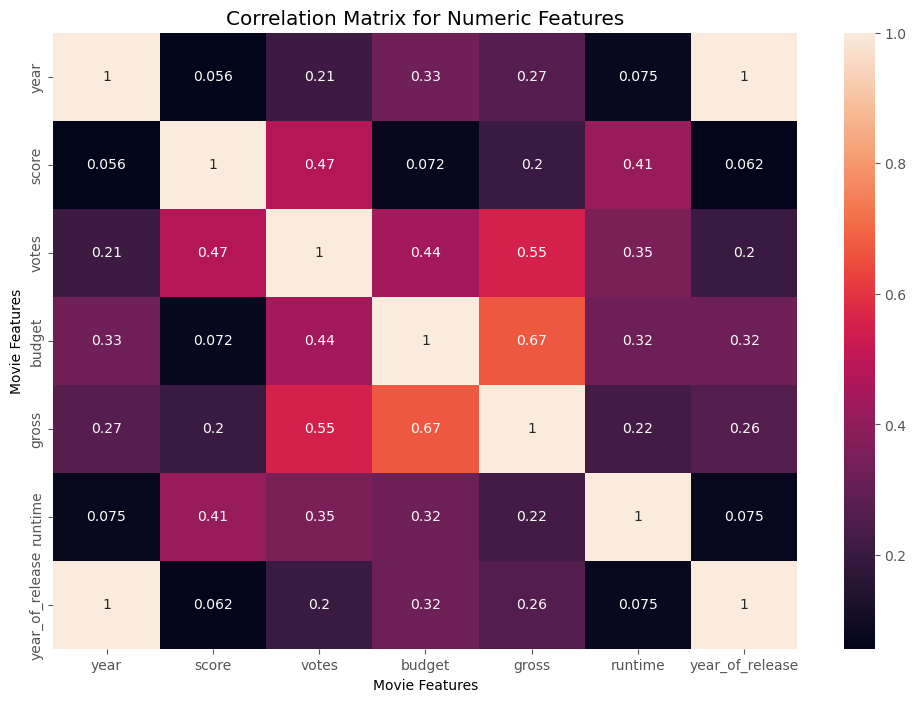

In [75]:
correlation_matrix = df.corr(numeric_only=True, method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [96]:
# Company vs Revenue

# Associate a numerical value to each company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country       budget         gross  company  runtime  
5445  2334       55  237000000.0  2.847246e+09     2253    162.0  
7445  2241       55  356000000.0  2.797501e+09     1606    181.0  
3045  1595       55  200000000.0  2.201647e+09     2253    194.0  
6663   524       55  245000000.0  2.069522e+09     1540    138.0  
7244  2241       55  321000000.0  2.048360e+09     1606    149.0

In [95]:
# Reran import and sort statements to compare the non numerical features with the new dataframe that associates non-numerical features to a number

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country       budget         gross  company  runtime  
5445  2334       55  237000000.0  2.847246e+09     2253    162.0  
7445  2241       55  356000000.0  2.797501e+09     1606    181.0  
3045  1595       55  200000000.0  2.201647e+09     2253    194.0  
6663   524       55  245000000.0  2.069522e+09     1540    138.0  
7244  2241       55  321000000.0  2.048360e+09     1606    149.0

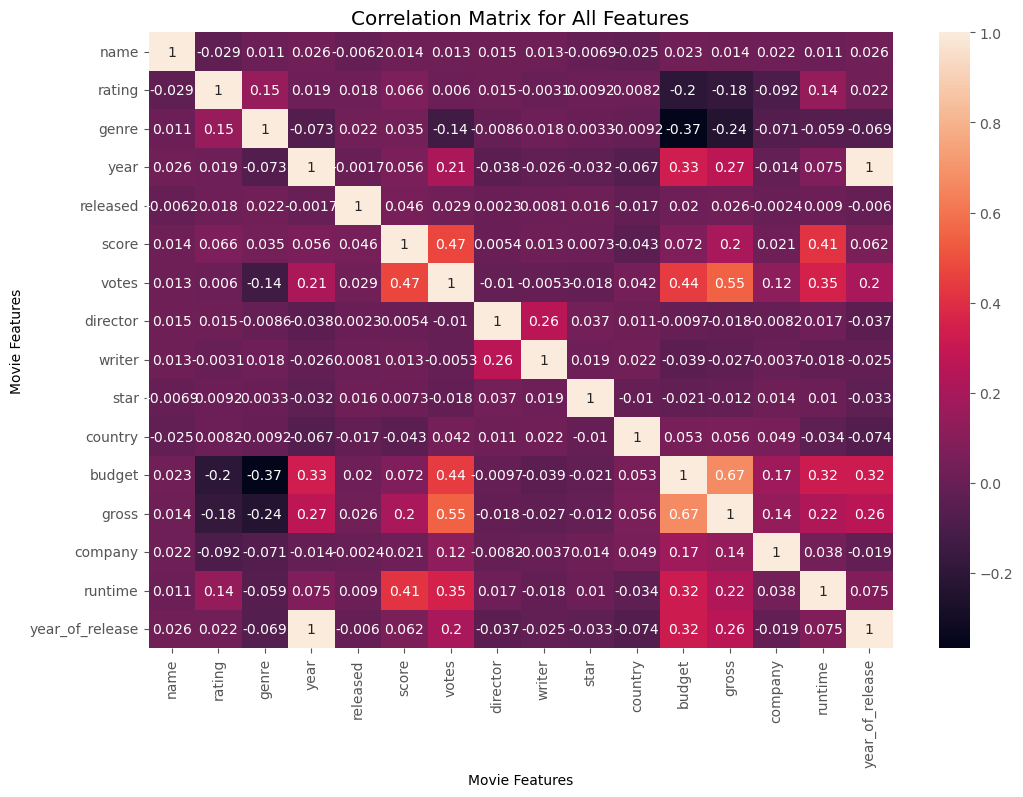

In [85]:
correlation_matrix = df_numerized.corr(numeric_only=True, method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for All Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [91]:
corr_pairs= correlation_mat.unstack()

In [92]:
corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 year               0.025542
                 released          -0.006152
                 score              0.014450
                 votes              0.012615
                 director           0.015246
                 writer             0.012880
                 star              -0.006882
                 country           -0.025490
                 budget             0.023392
                 gross              0.014073
                 company            0.021697
                 runtime            0.010850
                 year_of_release    0.025542
rating           name              -0.029234
                 rating             1.000000
                 genre              0.147796
                 year               0.019499
                 released           0.018083
                 score              0.065983
          

In [94]:
sorted_corr_pairs = corr_pairs.sort_values()

high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]

high_corr

gross            votes              0.550649
votes            gross              0.550649
budget           gross              0.669203
gross            budget             0.669203
year             year_of_release    0.998726
year_of_release  year               0.998726
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year_of_release  year_of_release    1.000000
dtype: flo

In [ ]:
# Votes and budget have the highest correlation